In [33]:
DATASET_PATH = '/Users/johntimothysummers/Marsyas/genres'

import pt_analyzeaudio
import jupyter_pt_tools as jpt_pt
import os
import IPython.display as ipd


 Processing pop


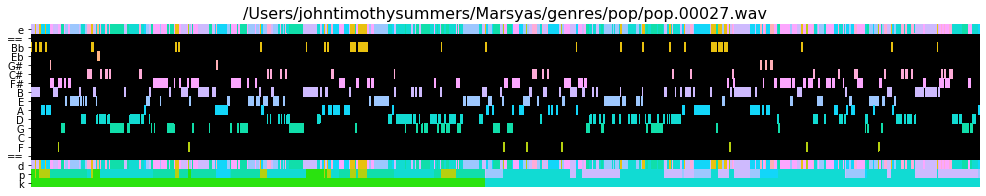

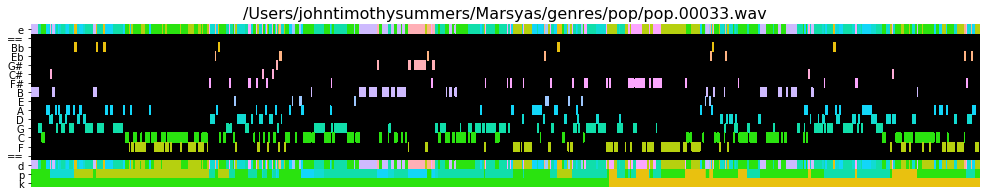

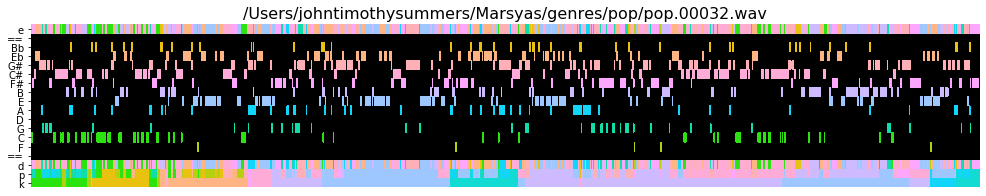

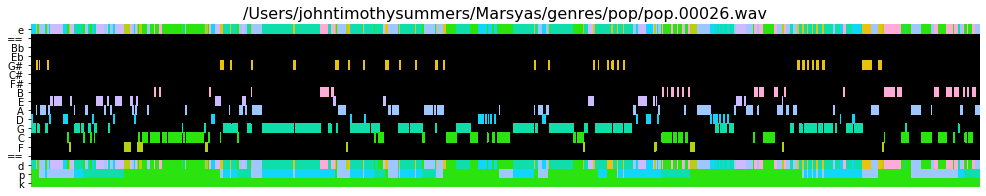


 Processing metal


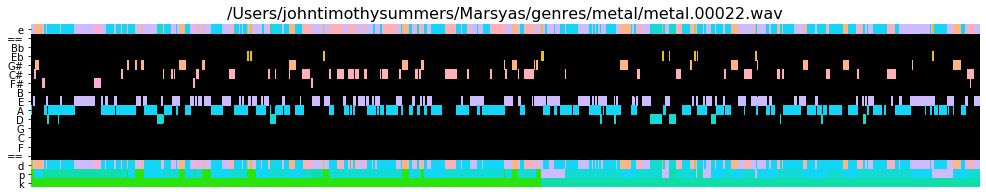

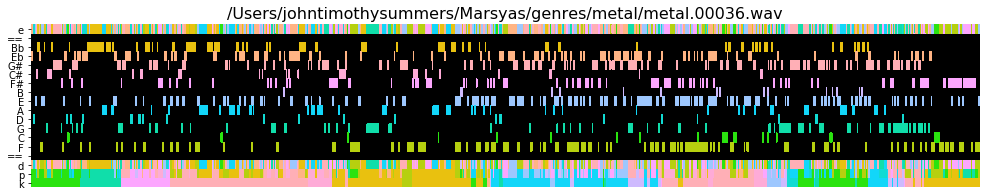

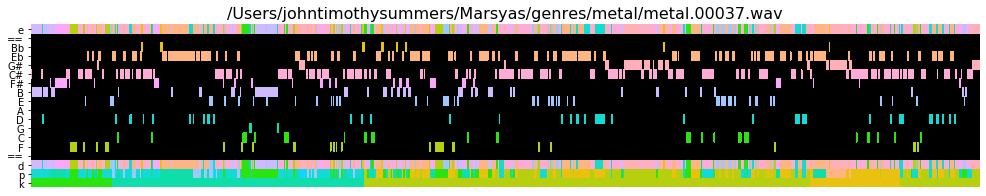

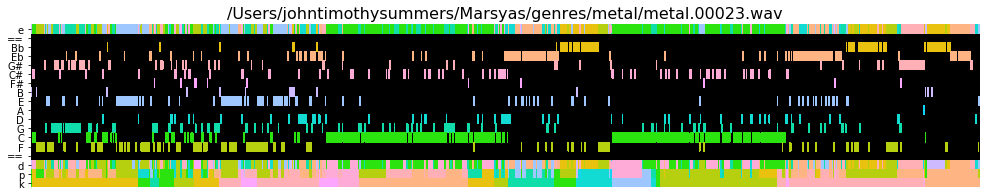


 Processing disco


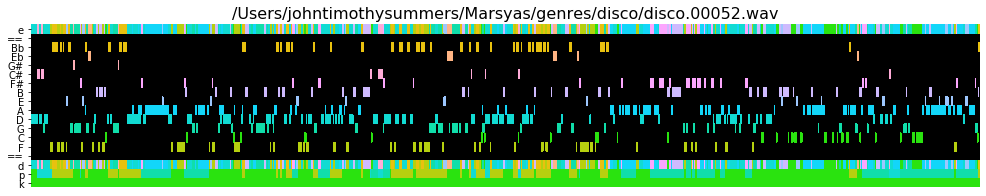

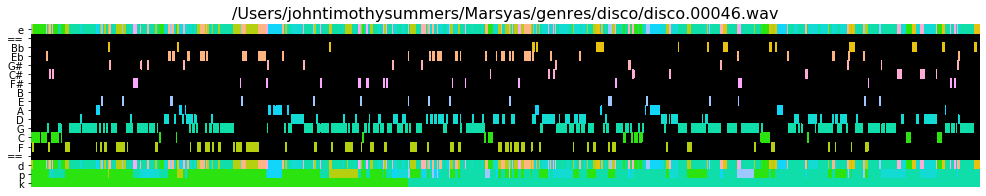

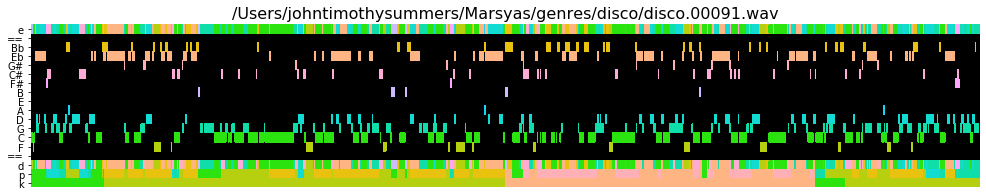

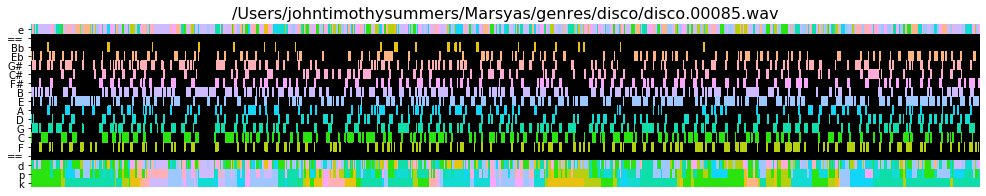


 Processing blues


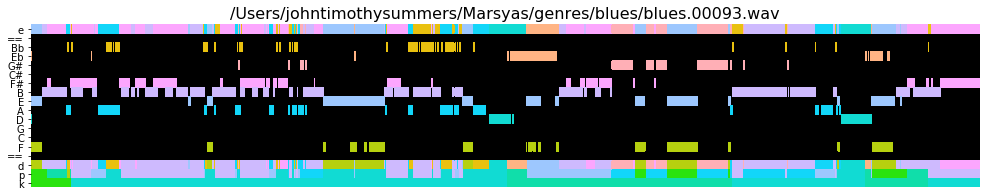

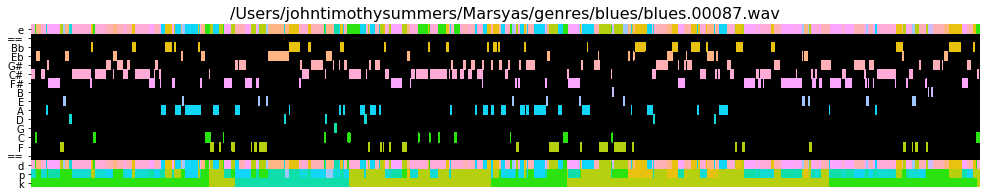

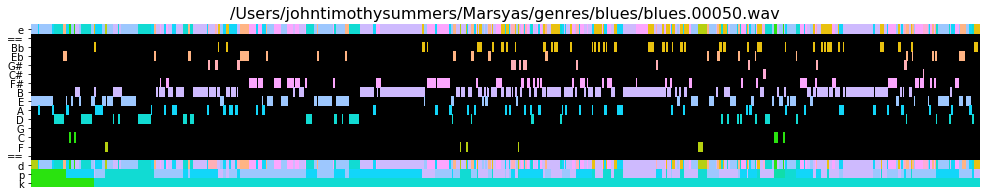

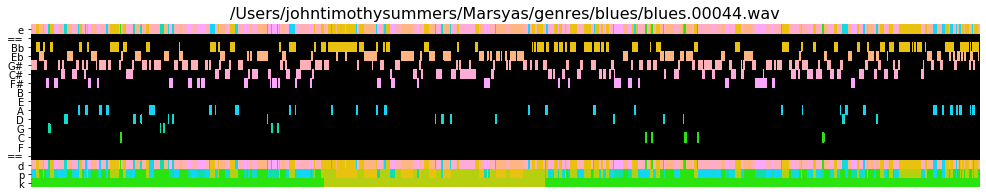


 Processing reggae


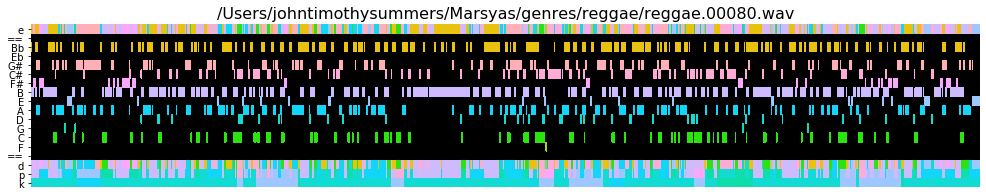

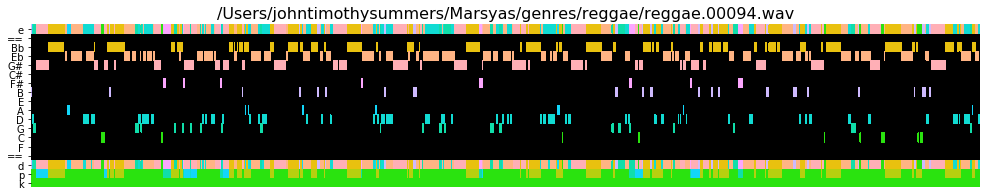

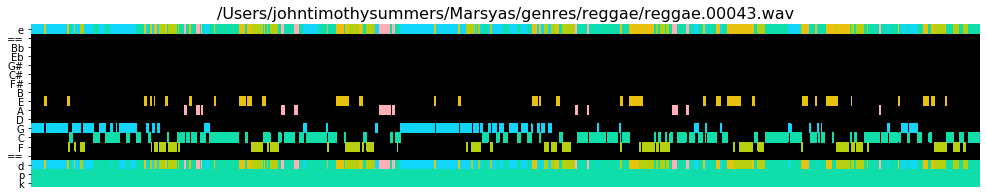

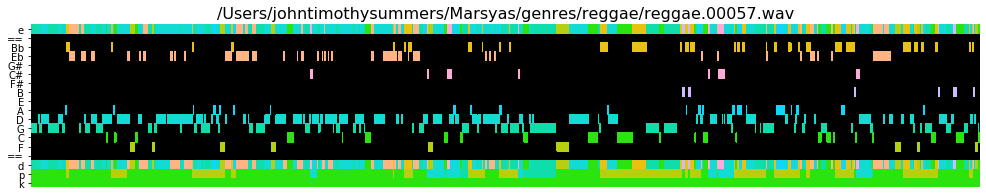


 Processing classical


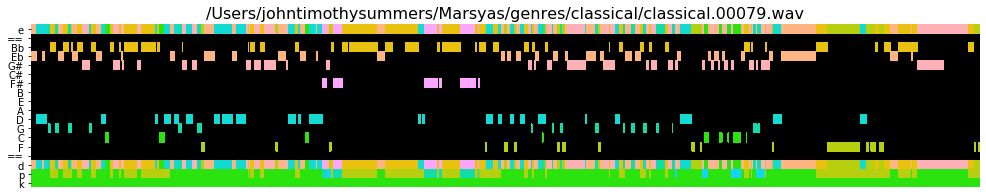

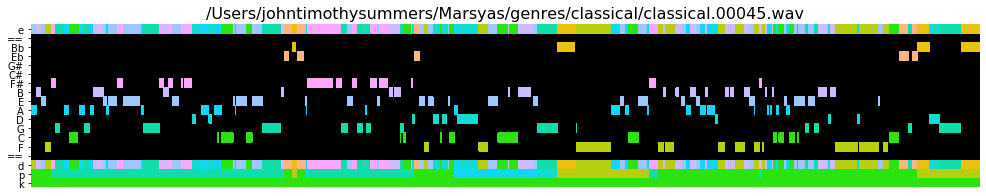

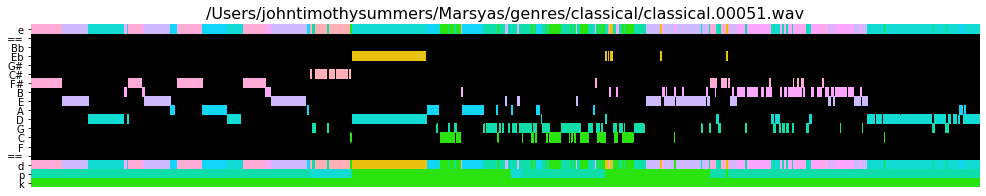

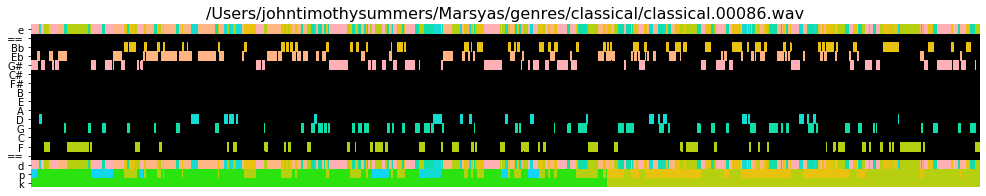


 Processing rock


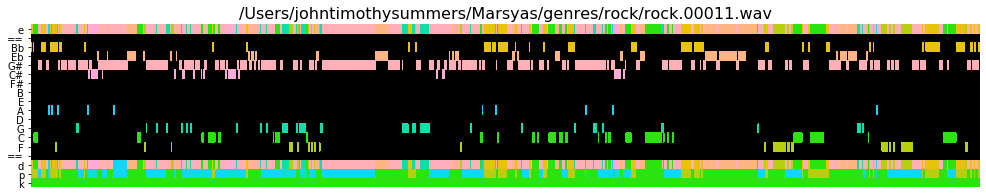

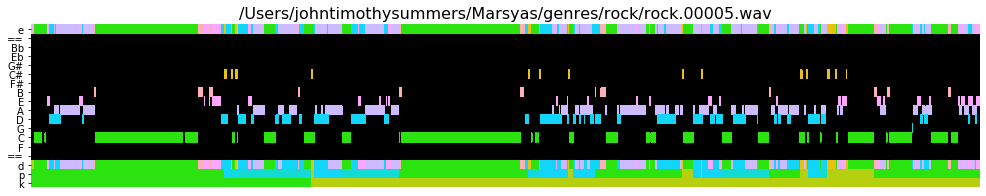

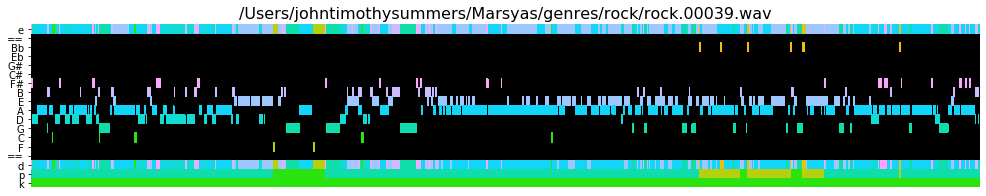

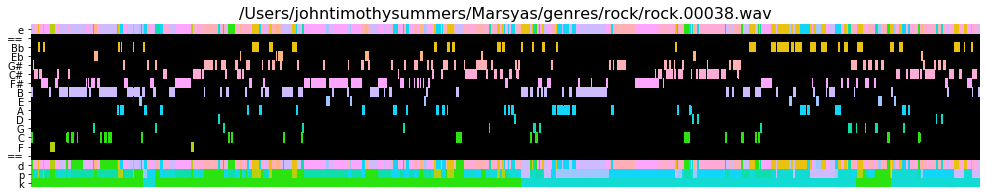


 Processing hiphop


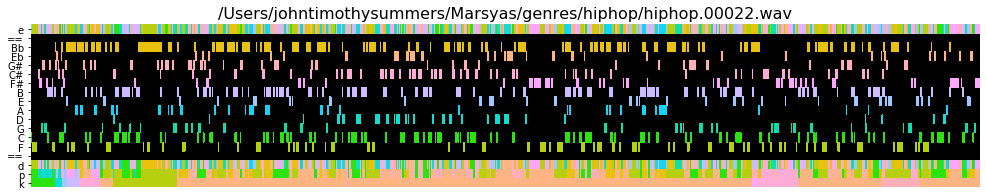

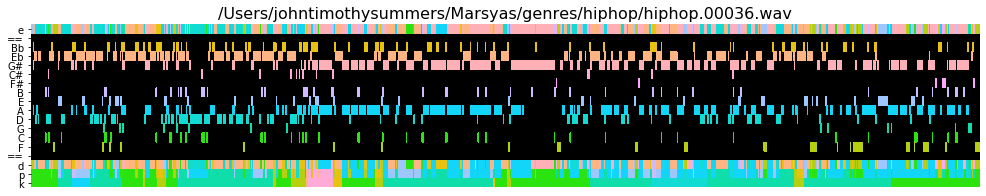

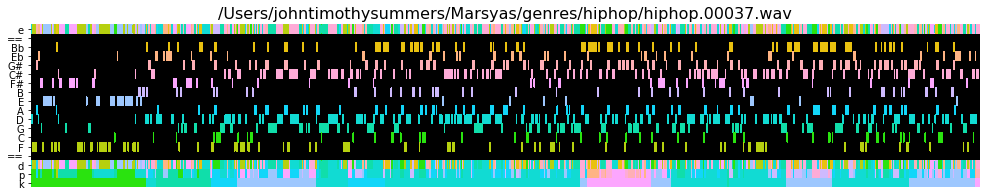

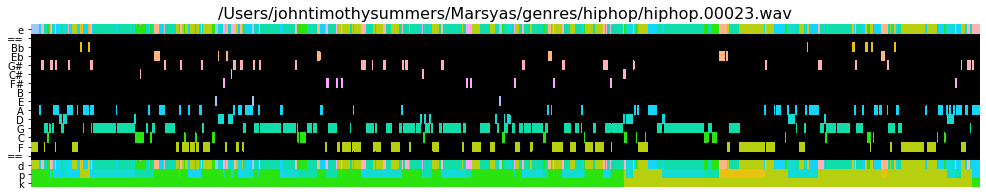


 Processing country


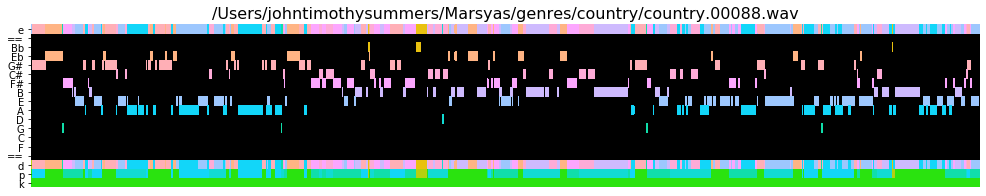

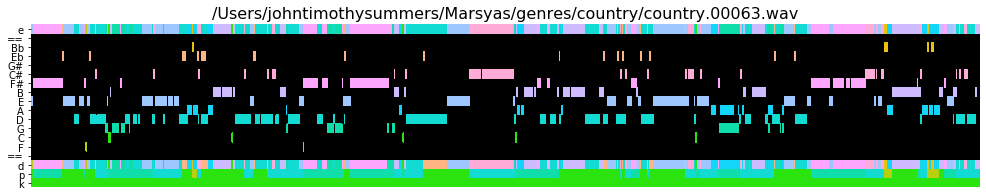

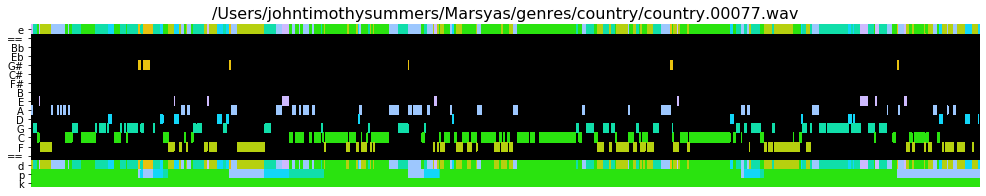

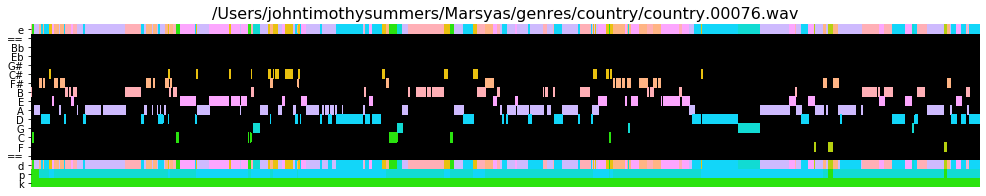


 Processing jazz


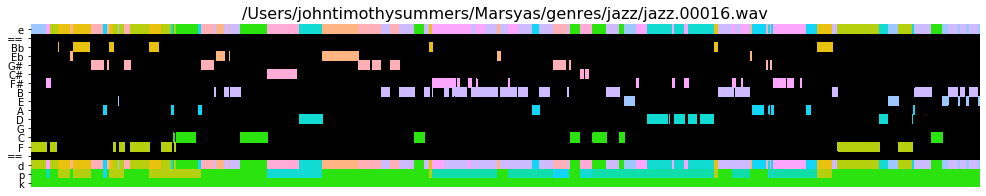

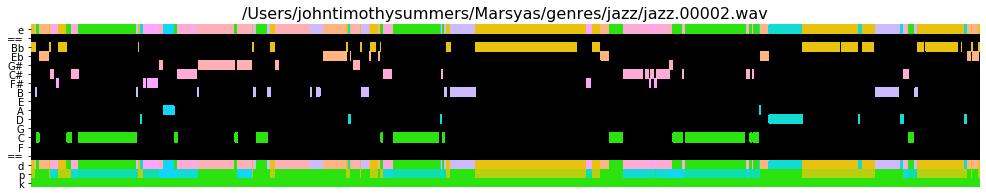

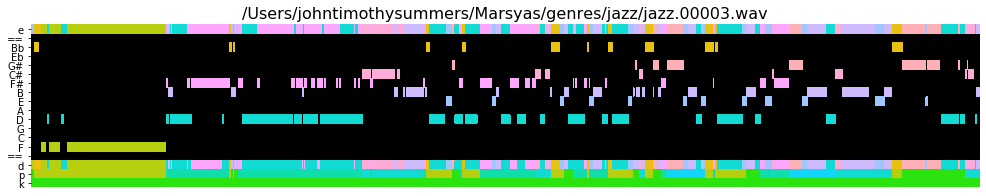

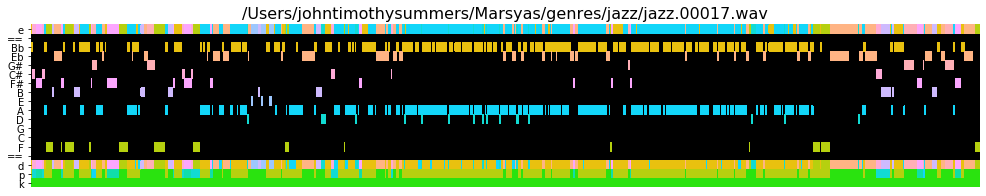

In [35]:
# in general, for noisy music we need a high threshold to find key area
#             for quieter, more note-oriented music, we need a lower threshold
#             finding a *separate* harmony-framework for different genres would require some changes either
#                   to the threshold or to the waveform (normalize??? clean???)

CHROMA_THRESHOLD = 0.85
FILES_PER_FOLDER = 4

def analyze_all():
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
        # ensure that we are not at the root level
        if dirpath is not DATASET_PATH:
            dirpath_components = dirpath.split("/") # genre/blues => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            print("\n Processing {}".format(semantic_label))
            
            # loop through files for processing within genre
            for j, f in enumerate(filenames):
                if (j < FILES_PER_FOLDER):
                    analyze_one(f, dirpath, chroma_threshold=CHROMA_THRESHOLD)

def analyze_one(f, dirpath, chroma_threshold=0.6):
    # load audio from path
    file_path = os.path.join(dirpath, f)
    bin_a, kpdve_a = pt_analyzeaudio.kpdve_analyze_audiofile(file_path,chroma_threshold=chroma_threshold)
    jpt_pt.bin_a_kpdve_a_heatmap(bin_a, kpdve_a, title=file_path)
    ipd.Audio(file_path, rate=22050)
    
analyze_all()

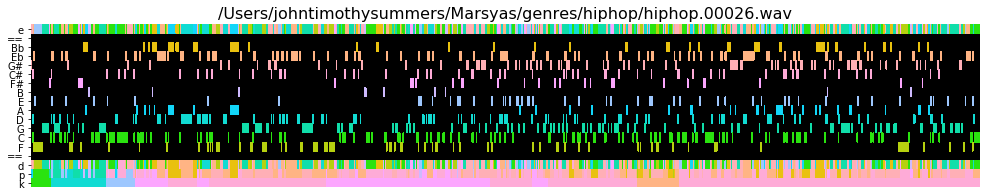

In [115]:
genre = 'hiphop'
numstring = '00026'
threshold = 0.9
path = DATASET_PATH +'/' + genre + '/'
file =  genre +'.' + numstring + '.wav'
analyze_one(file, path, chroma_threshold=threshold)
file_path=path+file
ipd.Audio(file_path, rate=22050)